**Titanic project**<br>
Author: Patryk Franaszczuk

# I. Data set analysis
In this section I deal with loading the data, getting to know the entire set and its size.<br>
I display basic metrics such as averages and medians to become even more familiar with the data set.<br>
I'm looking at missing values, misinterpretation of variable types.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [39]:
pd.set_option('display.max_columns', None)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,NaN,135.00,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.45,NaN,C,NaN,328.00,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.45,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.22,NaN,C,NaN,304.00,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.22,NaN,C,NaN,NaN,NaN


In [40]:
# Check how much of data is null in %
df_isna = df.isna().sum() > 0
df.loc[:,df_isna].isna().sum().sort_values(ascending=False) / len(df)*100

body        90.76
cabin       77.46
boat        62.87
home_dest   43.09
age         20.09
embarked     0.15
fare         0.08
dtype: float64

In [41]:
# Need to drop empty/almost empty/useless in this data set columns
df.drop(["cabin", "boat", "body", "home_dest", "ticket"], axis='columns', inplace=True)

In [42]:
df_isna = df.isna().sum() > 0
df.loc[:,df_isna].isna().sum().sort_values(ascending=False) / len(df)*100

age        20.09
embarked    0.15
fare        0.08
dtype: float64

In [43]:
# Filling columns with median or average values
df['fare'].fillna(df['fare'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [44]:
# Checking shape of data set
print("Amount of observations:", df.shape[0])
print("Amount of variables:", df.shape[1])

Amount of observations: 1309
Amount of variables: 9


In [45]:
# Print some data
pd.set_option('display.max_columns', None)
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
141,1,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.00,0,1,63.36,C
273,1,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,134.50,C
469,2,1,"Keane, Miss. Nora A",female,NaN,0,0,12.35,Q
822,3,0,"Goldsmith, Mr. Nathan",male,41.00,0,0,7.85,S
613,3,1,"Albimona, Mr. Nassef Cassem",male,26.00,0,0,18.79,C
722,3,0,"Coleff, Mr. Satio",male,24.00,0,0,7.50,S
581,2,0,"Watson, Mr. Ennis Hastings",male,NaN,0,0,0.00,S
1157,3,0,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,20.21,S
693,3,1,"Buckley, Mr. Daniel",male,21.00,0,0,7.82,Q
934,3,1,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,22.02,S


In [46]:
# Data format
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Numeric variables summary
numeric_columns = df.select_dtypes(include='number')
numeric_summary = numeric_columns.describe().transpose()

# Information about missing data
missing_numeric = df.select_dtypes(include='number').isna().sum()
missing_total = df.isna().sum()
numeric_summary['Missing Data'] = missing_numeric + missing_total

# Summary
print(numeric_summary.to_string(index=True))

           count  mean   std  min   25%   50%   75%    max  Missing Data
pclass   1309.00  2.29  0.84 1.00  2.00  3.00  3.00   3.00          0.00
survived 1309.00  0.38  0.49 0.00  0.00  0.00  1.00   1.00          0.00
age      1046.00 29.88 14.41 0.17 21.00 28.00 39.00  80.00        526.00
sibsp    1309.00  0.50  1.04 0.00  0.00  0.00  1.00   8.00          0.00
parch    1309.00  0.39  0.87 0.00  0.00  0.00  0.00   9.00          0.00
fare     1309.00 33.28 51.74 0.00  7.90 14.45 31.27 512.33          0.00


# II. Feature Engineering
Here I started filling in the missing data in the "age" column. I used the analysis of different groups of passengers, such as women with the title "Miss", men with the title "Master", and other groups with the titles "Sir", "Mr", "Ms" and "Mrs". Based on the average ages for these groups and taking into account gender, I imputed missing age values.<br>
Additionally, I created three new variables. These variables provide a starting point for further analysis and modeling.

In [47]:
df['title'] = df['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Titles conditions
miss_condition = (df['title'] == 'Miss') & (df['parch'] == 0) & (df['sex'] == 'female')
master_condition = (df['title'] == 'Master') & (df['sex'] == 'male')
mature_conditions = df['title'].isin(['Sir', 'Mr', 'Ms', 'Mrs']) & (df['sex'] == 'male')
dr_conditions = (df['title'] == 'Dr') & (df['sex'] == 'male')

# Average values
average_age_miss = df.loc[miss_condition, 'age'].mean().round(2)
average_age_master = df.loc[master_condition, 'age'].mean().round(2)
average_age_mature = df.loc[mature_conditions, 'age'].mean().round(2)
average_age_dr = df.loc[dr_conditions, 'age'].mean().round(2)

print(f"Average age for Miss: {average_age_miss}")
print(f"Average age for Master: {average_age_master}")
print(f"Average age for Sir, Mr, Ms, Mrs: {average_age_mature}")
print(f"Average age for Dr: {average_age_dr}")


Average age for Miss: 27.22
Average age for Master: 5.48
Average age for Sir, Mr, Ms, Mrs: 32.28
Average age for Dr: 42.67


In [48]:
# Filling data on condition based on age and sex
df.loc[miss_condition & df['age'].isnull(), 'age'] = average_age_miss
df.loc[master_condition & df['age'].isnull(), 'age'] = average_age_master
df.loc[mature_conditions & df['age'].isnull(), 'age'] = average_age_mature
df.loc[dr_conditions & df['age'].isnull(), 'age'] = average_age_dr

average_age_female = df.loc[df['sex'] == 'female', 'age'].mean().round(2)
average_age_male = df.loc[df['sex'] == 'male', 'age'].mean().round(2)

df.loc[(df['age'].isnull()) & (df['sex'] == 'female'), 'age'] = average_age_female
df.loc[(df['age'].isnull()) & (df['sex'] == 'male'), 'age'] = average_age_male

In [49]:
age_bins = [0, 6, 12, 18, 80]
age_labels = ['Baby', 'Kid', 'Teenager', 'Adult']
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

df['family_size'] = df['parch'] + df['sibsp'] + 1
df['mpc'] = df['age'] * df['pclass']

df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,age_range,family_size,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.34,S,Miss,Adult,1,29.00
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.55,S,Master,Baby,4,0.92
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.55,S,Miss,Baby,4,2.00
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.55,S,Mr,Adult,4,30.00
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.55,S,Mrs,Adult,4,25.00


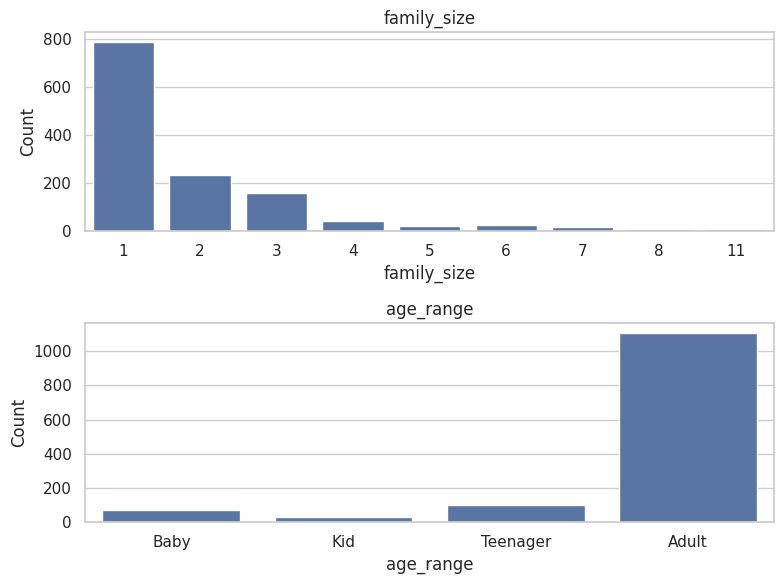

In [50]:
sns.set(style="whitegrid")
columns_to_plot = ['family_size', 'age_range']
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(8, 6), tight_layout=True)

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    sns.countplot(x=df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.show()

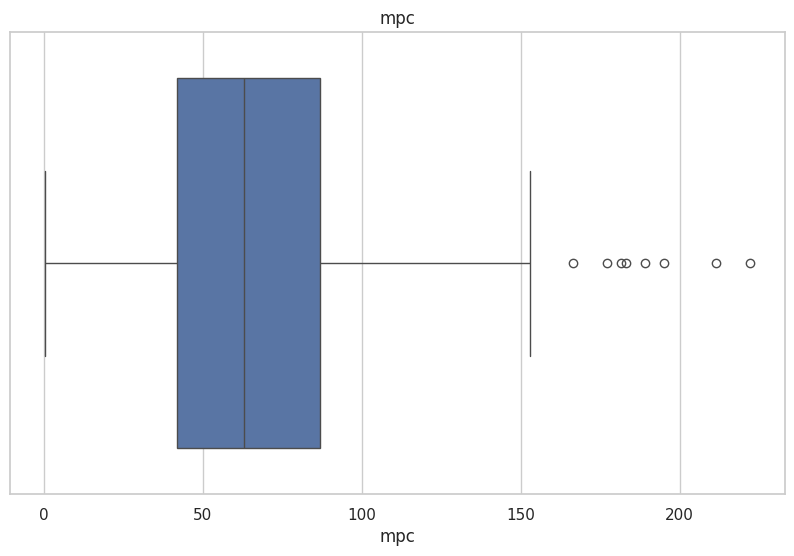

In [51]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mpc'])
plt.title('mpc')
plt.xlabel('mpc')
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   int64   
 1   survived     1309 non-null   int64   
 2   name         1309 non-null   object  
 3   sex          1309 non-null   object  
 4   age          1309 non-null   float64 
 5   sibsp        1309 non-null   int64   
 6   parch        1309 non-null   int64   
 7   fare         1309 non-null   float64 
 8   embarked     1309 non-null   object  
 9   title        1309 non-null   object  
 10  age_range    1309 non-null   category
 11  family_size  1309 non-null   int64   
 12  mpc          1309 non-null   float64 
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB


#III. Editing metadata
I check the types of individual columns. It is worth introducing a few categorical columns to which such a change fits.<br>
The "fare" column will match the float type.

In [53]:
# Column types changes
df['survived'] = df['survived'].astype('category')
df['pclass'] = df['pclass'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

missing_fare = df['fare'].isnull().sum()
if missing_fare > 0:
    print(f'Amount of missing data in column "fare": {missing_fare}')
else:
    df['fare'] = df['fare'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   category
 1   survived     1309 non-null   category
 2   name         1309 non-null   object  
 3   sex          1309 non-null   category
 4   age          1309 non-null   float64 
 5   sibsp        1309 non-null   int64   
 6   parch        1309 non-null   int64   
 7   fare         1309 non-null   float64 
 8   embarked     1309 non-null   category
 9   title        1309 non-null   object  
 10  age_range    1309 non-null   category
 11  family_size  1309 non-null   int64   
 12  mpc          1309 non-null   float64 
dtypes: category(5), float64(3), int64(3), object(2)
memory usage: 89.0+ KB


#IV. Completing missing data
I fill in the missing data through imputation and check the effects.

In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = ['age', 'fare', 'mpc']
df_imputed = df.copy()
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

print("Amount of missing data after imputation:")
print(df_imputed.isnull().sum())

df[columns_to_impute] = df_imputed[columns_to_impute]

Amount of missing data after imputation:
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
title          0
age_range      0
family_size    0
mpc            0
dtype: int64


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   category
 1   survived     1309 non-null   category
 2   name         1309 non-null   object  
 3   sex          1309 non-null   category
 4   age          1309 non-null   float64 
 5   sibsp        1309 non-null   int64   
 6   parch        1309 non-null   int64   
 7   fare         1309 non-null   float64 
 8   embarked     1309 non-null   category
 9   title        1309 non-null   object  
 10  age_range    1309 non-null   category
 11  family_size  1309 non-null   int64   
 12  mpc          1309 non-null   float64 
dtypes: category(5), float64(3), int64(3), object(2)
memory usage: 89.0+ KB


# V. Trim outliers
In this section I deal with outliers to get clearer data.<br>
I constantly display charts of given columns to be able to visualize what I can do in a given column.

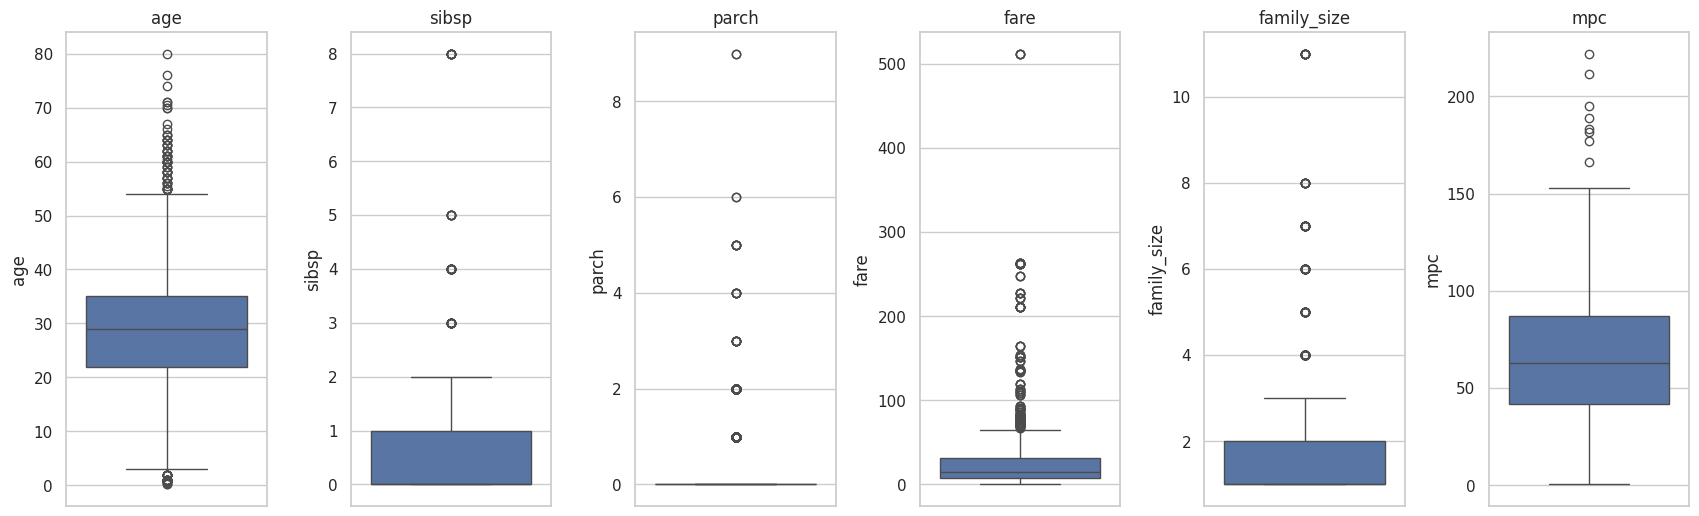

In [56]:
# Presentation of numerical variables for trim analysis
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

num_columns = len(numeric_columns)

num_rows = (num_columns - 1)

plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 7, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

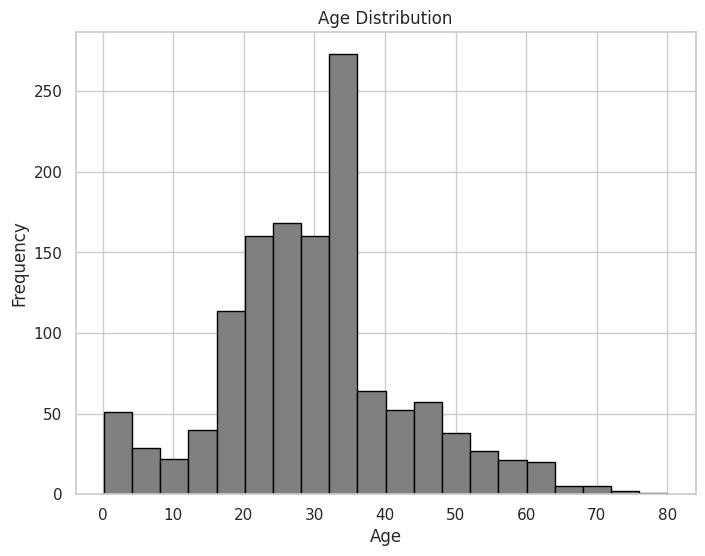

In [57]:
# Checking age column
age_data = df['age'].dropna()

plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, color='grey', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [58]:
# Find age values above 67
outliers_index = df[df['age'] > 67].index

average_age = df['age'].mean()

df.loc[outliers_index, 'age'] = average_age

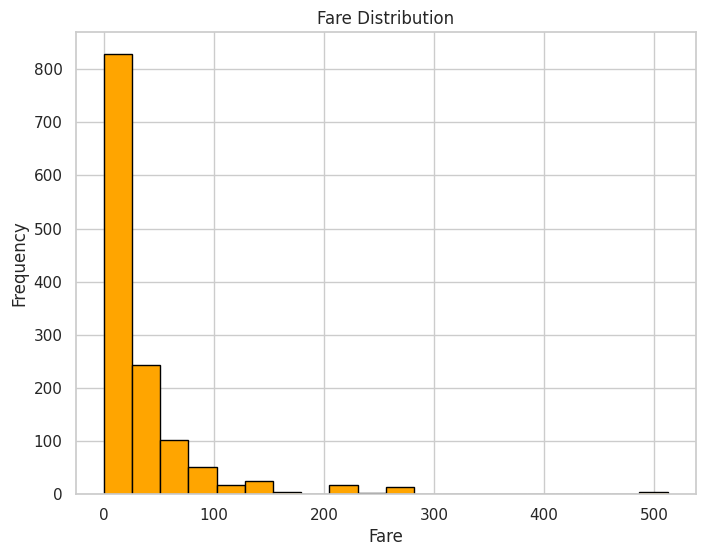

In [59]:
# Fare column
fare_data = df['fare'].dropna()

plt.figure(figsize=(8, 6))
plt.hist(fare_data, bins=20, color='orange', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [60]:
fare_above_250 = df[df['fare'] > 250]
count_fare_above_250 = fare_above_250.shape[0]

print("Amount of 'fare' values above 250:", count_fare_above_250)

Amount of 'fare' values above 250: 17


In [61]:
mean_fare = df['fare'].mean()

df.loc[df['fare'] > 250, 'fare'] = mean_fare

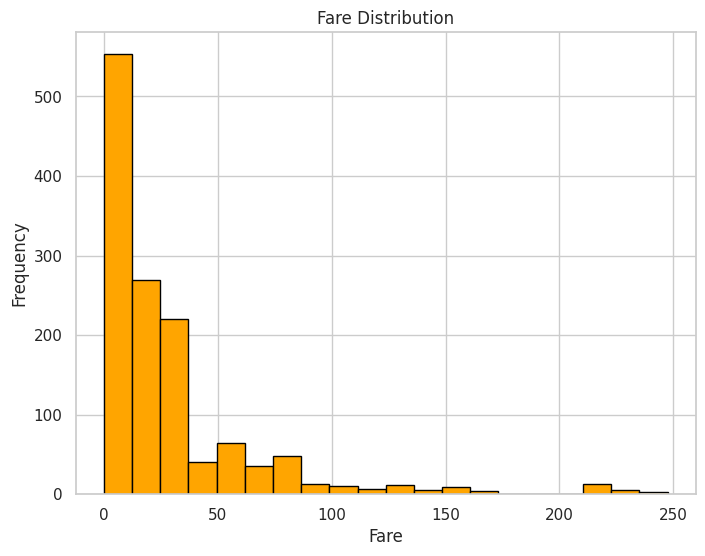

In [62]:
fare_data = df['fare'].dropna()

plt.figure(figsize=(8, 6))
plt.hist(fare_data, bins=20, color='orange', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

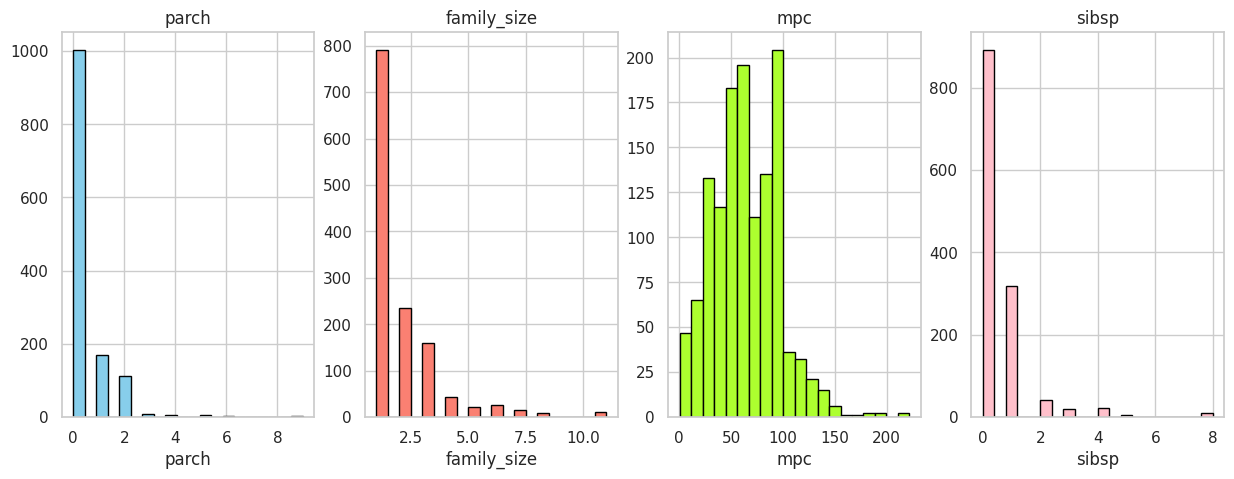

In [63]:
# Histograms for columns 'parch', 'family_size', 'mpc'
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

axes[0].hist(df['parch'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('parch')
axes[0].set_xlabel('parch')

axes[1].hist(df['family_size'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('family_size')
axes[1].set_xlabel('family_size')

axes[2].hist(df['mpc'], bins=20, color='greenyellow', edgecolor='black')
axes[2].set_title('mpc')
axes[2].set_xlabel('mpc')

axes[3].hist(df['sibsp'], bins=20, color='pink', edgecolor='black')
axes[3].set_title('sibsp')
axes[3].set_xlabel('sibsp')

plt.show()

In [64]:
mean_parch = df.loc[df['parch'] <= 7, 'parch'].mean()
df.loc[df['parch'] > 7, 'parch'] = mean_parch

mean_sibsp = df.loc[df['sibsp'] <= 5, 'sibsp'].mean()
df.loc[df['sibsp'] > 5, 'sibsp'] = mean_sibsp

df['family_size'] = df['parch'] + df['sibsp'] + 1

mean_family_size = df.loc[df['family_size'] <= 8.5, 'family_size'].mean()
df.loc[df['family_size'] > 8.5, 'family_size'] = mean_family_size

mean_mpc = df.loc[df['mpc'] <= 155, 'mpc'].mean()
df.loc[df['mpc'] > 155, 'mpc'] = mean_mpc

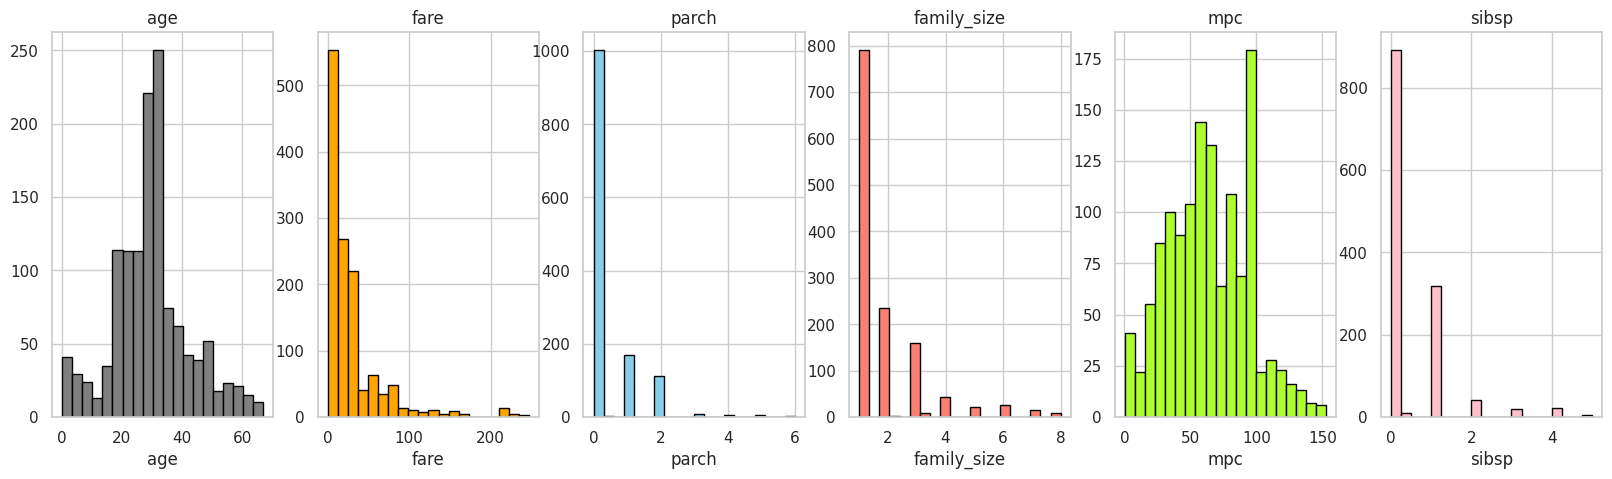

In [65]:
# Histograms of columns that I have worked on
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))

axes[0].hist(df['age'], bins=20, color='grey', edgecolor='black')
axes[0].set_title('age')
axes[0].set_xlabel('age')

axes[1].hist(df['fare'], bins=20, color='orange', edgecolor='black')
axes[1].set_title('fare')
axes[1].set_xlabel('fare')

axes[2].hist(df['parch'], bins=20, color='skyblue', edgecolor='black')
axes[2].set_title('parch')
axes[2].set_xlabel('parch')

axes[3].hist(df['family_size'], bins=20, color='salmon', edgecolor='black')
axes[3].set_title('family_size')
axes[3].set_xlabel('family_size')

axes[4].hist(df['mpc'], bins=20, color='greenyellow', edgecolor='black')
axes[4].set_title('mpc')
axes[4].set_xlabel('mpc')

axes[5].hist(df['sibsp'], bins=20, color='pink', edgecolor='black')
axes[5].set_title('sibsp')
axes[5].set_xlabel('sibsp')

plt.show()

#VI. Normalization of numerical data
Here I normalize the numerical data, this process occurs after trimming the outliers in the dataset.<br>
I chose MinMaxScaler to transform the data.

In [66]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['age', 'sibsp', 'parch', 'fare', 'family_size', 'mpc']
df_normalized = df.copy()
scaler = MinMaxScaler()
df_normalized[numeric_columns] = scaler.fit_transform(df_normalized[numeric_columns])

print(df_normalized.head())

  pclass survived                                             name sex  age  \
0      1        1                    Allen, Miss. Elisabeth Walton   0 0.43   
1      1        1                   Allison, Master. Hudson Trevor   1 0.01   
2      1        0                     Allison, Miss. Helen Loraine   0 0.03   
3      1        0             Allison, Mr. Hudson Joshua Creighton   1 0.45   
4      1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   0 0.37   

   sibsp  parch  fare embarked   title age_range  family_size  mpc  
0   0.00   0.00  0.85        S    Miss     Adult         0.00 0.19  
1   0.20   0.33  0.61        S  Master      Baby         0.43 0.00  
2   0.20   0.33  0.61        S    Miss      Baby         0.43 0.01  
3   0.20   0.33  0.61        S      Mr     Adult         0.43 0.19  
4   0.20   0.33  0.61        S     Mrs     Adult         0.43 0.16  


In [67]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,age_range,family_size,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0.00,0.00,211.34,S,Miss,Adult,1.00,29.00
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1.00,2.00,151.55,S,Master,Baby,4.00,0.92
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1.00,2.00,151.55,S,Miss,Baby,4.00,2.00
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1.00,2.00,151.55,S,Mr,Adult,4.00,30.00
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1.00,2.00,151.55,S,Mrs,Adult,4.00,25.00
5,1,1,"Anderson, Mr. Harry",1,48.00,0.00,0.00,26.55,S,Mr,Adult,1.00,48.00
6,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.00,1.00,0.00,77.96,S,Miss,Adult,2.00,63.00
7,1,0,"Andrews, Mr. Thomas Jr",1,39.00,0.00,0.00,0.00,S,Mr,Adult,1.00,39.00
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.00,2.00,0.00,51.48,S,Mrs,Adult,3.00,53.00
9,1,0,"Artagaveytia, Mr. Ramon",1,29.94,0.00,0.00,49.50,C,Mr,Adult,1.00,71.00


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   category
 1   survived     1309 non-null   category
 2   name         1309 non-null   object  
 3   sex          1309 non-null   category
 4   age          1309 non-null   float64 
 5   sibsp        1309 non-null   float64 
 6   parch        1309 non-null   float64 
 7   fare         1309 non-null   float64 
 8   embarked     1309 non-null   category
 9   title        1309 non-null   object  
 10  age_range    1309 non-null   category
 11  family_size  1309 non-null   float64 
 12  mpc          1309 non-null   float64 
dtypes: category(5), float64(6), object(2)
memory usage: 89.0+ KB


#VII. Algorithm selection
After selecting predictors and comparing several algorithms, I received a result of 78% effectiveness.<br>
I consider it a very good result and I am satisfied with the results of my work.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

predictors = ['pclass','sex','age','fare','family_size','mpc']
X = df[predictors]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
logistic_regression = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

models = [random_forest, decision_tree, svm, logistic_regression, knn]
model_names = ['Random Forest', 'Decision Tree', 'SVM', 'Logistic Regression', 'KNN']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Dokładność
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

    # Raport
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Trening
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    print(f"{name} Training Accuracy: {train_accuracy:.2f}\n\n\n")

Random Forest Accuracy: 0.78
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       144
           1       0.81      0.66      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262

Random Forest Training Accuracy: 0.97



Decision Tree Accuracy: 0.75
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       144
           1       0.75      0.65      0.70       118

    accuracy                           0.75       262
   macro avg       0.75      0.74      0.74       262
weighted avg       0.75      0.75      0.75       262

Decision Tree Training Accuracy: 0.97



SVM Accuracy: 0.66
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.

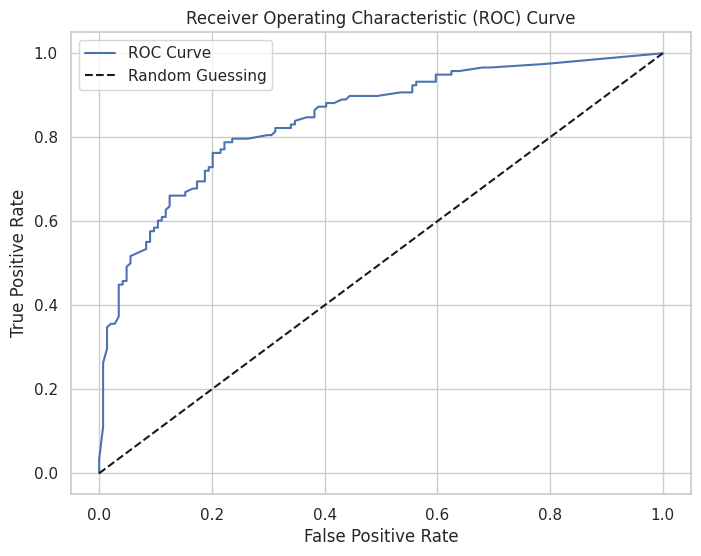

NameError: name 'y_pred_random_forest' is not defined

In [70]:
from sklearn.metrics import roc_curve, confusion_matrix

# ROC
y_prob = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([0, 1], ['Not Survived', 'Survived'])
plt.show()